In [1]:
#import modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

#read in data and review
df=pd.read_csv(Path('./app_stats.csv'))
df.head()

,Download Date,Download Location,y
0,3.368873,6.174326,0
1,-3.091484,0.052052,0
2,2.240576,1.259282,0
3,6.809486,5.390839,0
4,-3.557147,-0.667529,0


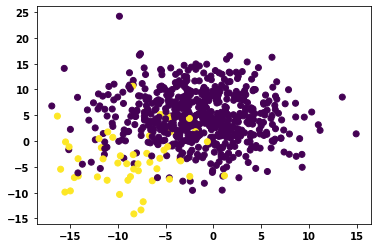

In [2]:
# Plot the data to identify any issues
plt.scatter(
    x=df['Download Date'],
    y=df['Download Location'],
    c=df['y']
)

plt.show()

In [3]:
#import train_test_split and split the data
from sklearn.model_selection import train_test_split

y=df['y']
x=df.drop(columns='y')

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [4]:
#count distinct values
y_train.value_counts()

0    448
1     39
Name: y, dtype: int64

In [5]:
#an equal representation of both classes is desired. Above shows a significant discrepancy between data sizes.
#import imblearn random oversampler in order to oversample and balance the data

from imblearn.over_sampling import RandomOverSampler

#resample data using oversampler
random_oversampler=RandomOverSampler(random_state=1)
x_resampled,y_resampled=random_oversampler.fit_resample(x_train,y_train)

In [6]:
# Reviewing the above: an instance of RandomOverSampler is instantiated as random_oversampler. Training data (x_train,y_train) is resampled via the
# fit_resample() function. The results are named x_resampled and y_resampled

#count new distinct values
y_resampled.value_counts()

0    448
1    448
Name: y, dtype: int64

In [7]:
# onto logistic regression, import the module, declare the model and fit
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=1)

model.fit(x_resampled,y_resampled)

LogisticRegression(random_state=1)

In [8]:
# import confusion_matrix, predict labels for testing features, and print the confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

print(confusion_matrix(y_test,y_pred))

[[131  21]
 [  1  10]]


In [9]:
#evaluate the model with balanced_accuracy_score which is similar to accuracy but this does a better job with imbalanced classes
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test,y_pred)

0.8854665071770335

In [11]:
# that's a nice score but can be misleading especially with imbalanced data. run classification_report_imbalanced to check it out
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.86      0.91      0.92      0.89      0.78       152
          1       0.32      0.91      0.86      0.48      0.89      0.79        11

avg / total       0.95      0.87      0.91      0.89      0.89      0.78       163



In [12]:
# the model did very well predicting users that will download the app but not use it at .99 precision
# the model did poorly at predicting users that will download the app and make a payment with .32 precision
# checking recall, the model did well really, accurately predicting 91% of all users who actually made a payment so really the model did okay
# with classification there are always tradeoffs. With the oversmapled data it is less precise but more accurately predicts the '1' values
# or those that will download and use the application. The original data is more precise but worse at accurately predicting the minority class